In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/comments.csv', encoding='utf-8')

# df=pd.read_csv('/content/drive/MyDrive/comments.csv')

In [ ]:
df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [ ]:
df=df.iloc[:,[2,4]]
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Comment    18408 non-null  object 
 1   Sentiment  18409 non-null  float64
dtypes: float64(1), object(1)
memory usage: 287.8+ KB


In [ ]:
df.isnull().sum()
df.dropna(axis=0,how='any',inplace=True)
df.columns
df['Sentiment']=df['Sentiment'].astype('int')

In [ ]:
df['total_characters'] = df['Comment'].apply(len)
df['total_words'] = df['Comment'].apply(lambda x: len(x.split()))
def simple_sentence_tokenize(text):
    # Count the number of sentence-ending punctuation marks
    sentence_count = text.count('.') + text.count('!') + text.count('?')
    # Ensure there's at least one sentence
    return max(1, sentence_count)

In [ ]:
df['total_sentences'] = df['Comment'].apply(simple_sentence_tokenize)

df['total_sentences'] = df['Comment'].apply(simple_sentence_tokenize)
mask0 = df['Sentiment'] == 0
mask1 = df['Sentiment'] == 1
mask2 = df['Sentiment'] == 2
df.head(2)

,Comment,Sentiment,total_characters,total_words,total_sentences
0,Let's not forget that Apple Pay in 2014 requir...,1,325,57,3
1,Here in NZ 50% of retailers don’t even have co...,0,167,29,2


In [ ]:
df[['total_characters','total_sentences','total_words']].describe()

,total_characters,total_sentences,total_words
count,18408.000000,18408.000000,18408.000000
mean,185.930193,2.694861,33.375815
std,268.451370,3.624982,46.499846
min,1.000000,1.000000,1.000000
25%,70.000000,1.000000,13.000000
50%,117.000000,2.000000,21.000000
75%,209.000000,3.000000,38.000000
max,8945.000000,121.000000,1684.000000


<Axes: xlabel='total_characters', ylabel='Count'>

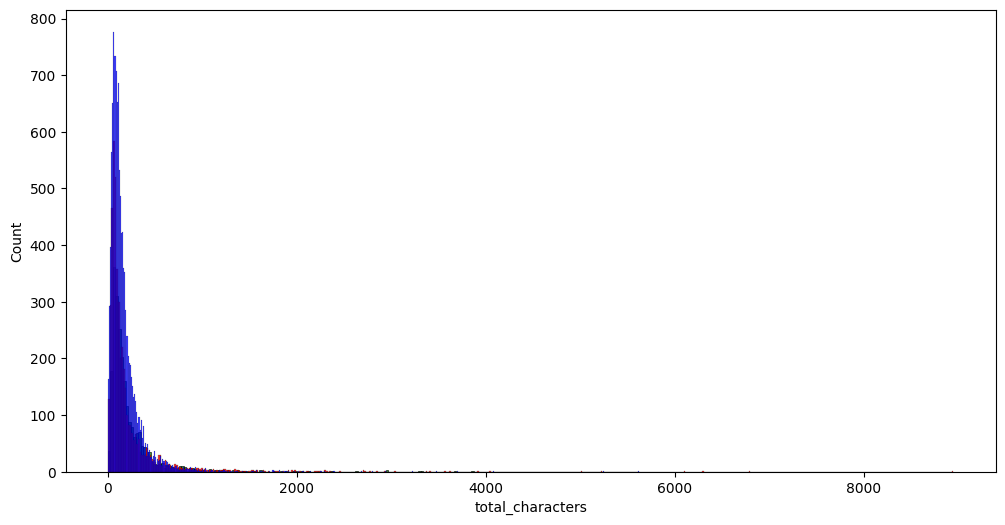

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Sentiment'] == 0]['total_characters'],color='green')
sns.histplot(df[df['Sentiment'] == 1]['total_characters'],color='red')
sns.histplot(df[df['Sentiment'] == 2]['total_characters'],color='blue')

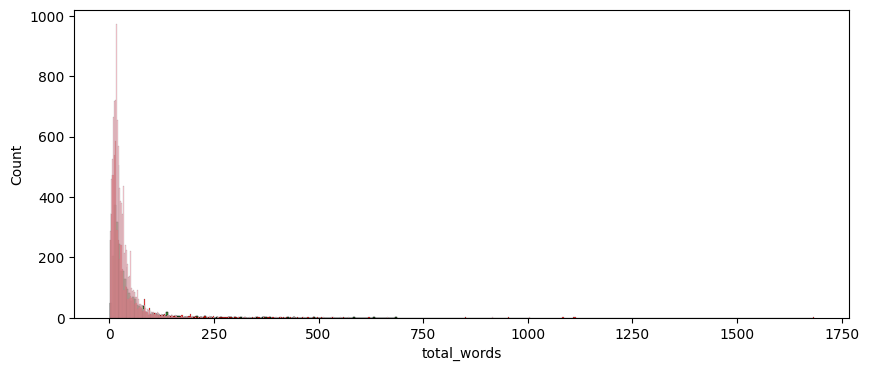

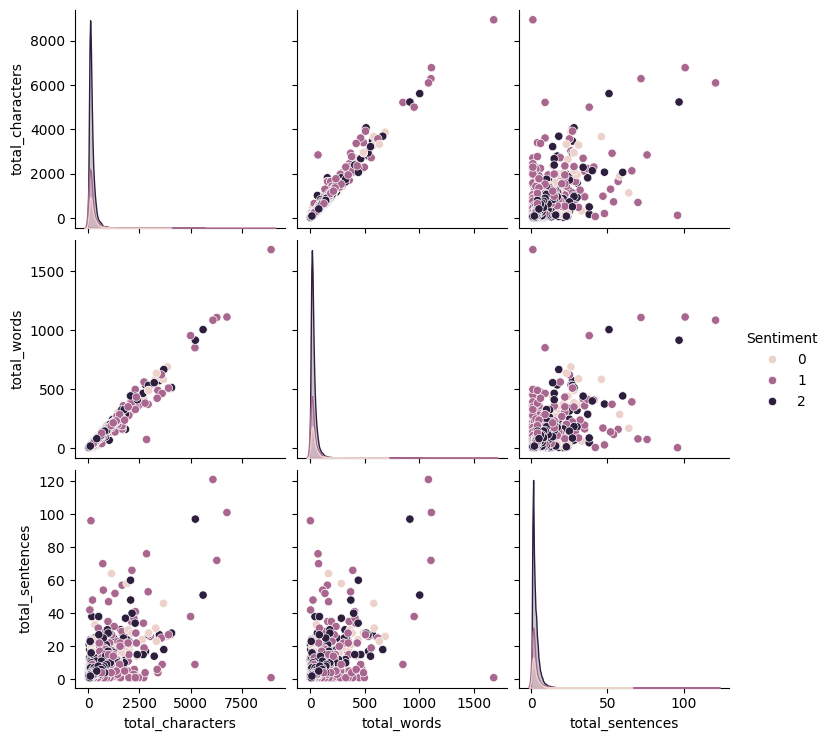

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['Sentiment'] == 0]['total_words'],color='green')
sns.histplot(df[df['Sentiment'] == 1]['total_words'],color='red')
sns.histplot(df[df['Sentiment'] == 2]['total_words'],color='pink')
sns.pairplot(df,hue='Sentiment')

In [ ]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)
print(df.dtypes)
numeric_columns = df.select_dtypes(include=['int64']).columns
print("numeric columns:",numeric_columns)
# Assuming df is your DataFrame
df_numeric = df.select_dtypes(include=[np.number])  # Filter only numeric columns

Non-numeric columns: Index(['Comment'], dtype='object')
Comment             object
Sentiment            int64
total_characters     int64
total_words          int64
total_sentences      int64
dtype: object
numeric columns: Index(['Sentiment', 'total_characters', 'total_words', 'total_sentences'], dtype='object')


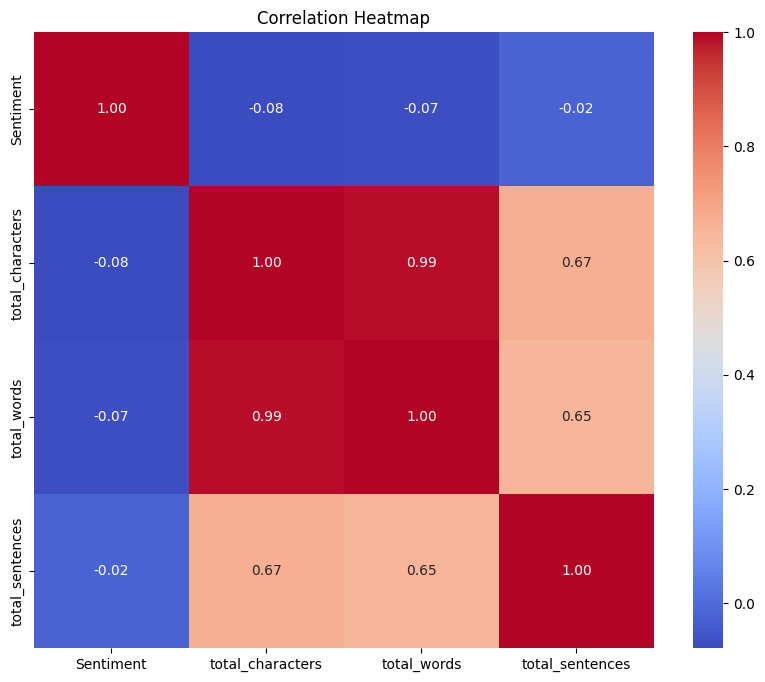

In [ ]:
# Generate the correlation matrix
corr_matrix = df_numeric.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df['Comment']=df['Comment'].str.lower()

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
sentiment_stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', "she's", 'her', 'herself', 'it', "it's", 'its', 'itself', 'they',
    'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
    'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so',
    'than',  'can', 'will', 'just', 'd', 'll', 'm', 'o', 're', 've', 'y',
    'ma'
]

In [ ]:
def preprocess_comment(comment):
    # Step 1: Remove special characters manually
    comment = ''.join([char if char.isalnum() or char.isspace() else ' ' for char in comment])

    # Step 2: Remove single characters
    words = comment.split()
    words = [word for word in words if len(word) > 1]

    # Step 3: Substitute multiple spaces with single space
    comment = ' '.join(words)

    # Step 4: Convert to lowercase
    comment = comment.lower()

    # Step 5: Tokenize and remove stopwords
    words = word_tokenize(comment)
    words = [word for word in words if word not in sentiment_stop_words]

    # Step 6: Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [ ]:
# Assuming df['Comment'] contains the text data
features = df['Comment'].tolist()  # Convert the 'Comment' column into a list of text data

processed_features = []
for sentence in features:
    # Apply the custom preprocessing function
    processed_feature = preprocess_comment(str(sentence))
    processed_features.append(processed_feature)

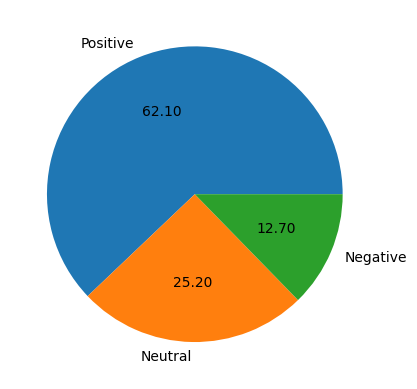

Sentiment
2    11432
1     4638
0     2338
Name: count, dtype: int64


In [ ]:
# If you want to store the processed features back into the DataFrame:
df['Processed_Comment'] = processed_features
plt.pie(df['Sentiment'].value_counts(), labels=['Positive','Neutral','Negative'],autopct="%0.2f")
plt.show()
# Check the new distribution
print(pd.Series(df['Sentiment'].value_counts()))

**Under Sampling**

In [ ]:
# # Separate the majority and minority classes
# df_majority = df[df['Sentiment'] == 2]  # Majority class
# df_minority_1 = df[df['Sentiment'] == 1]  # First minority class
# df_minority_2 = df[df['Sentiment'] == 0]  # Second minority class

# # Undersample the majority and larger minority class
# df_majority_undersampled = df_majority.sample(len(df_minority_2))  # Match to the smallest class (2338)
# df_minority_1_undersampled = df_minority_1.sample(len(df_minority_2))  # Match to the smallest class (2338)

# # Combine the undersampled majority and minority classes
# df = pd.concat([df_majority_undersampled, df_minority_1_undersampled, df_minority_2])

In [ ]:
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
# # Check the new distribution
# print(df['Sentiment'].value_counts())
# plt.pie(df['Sentiment'].value_counts(), labels=['Positive','neutral','Negative'],autopct="%0.2f")
# plt.show()

**Sentiment Words**

In [ ]:
positive_words = [
    'happy', 'good', 'excellent', 'awesome', 'fantastic', 'helpful',
    'useful', 'impressed', 'easy', 'sleek', 'fast', 'powerful',
    'lightweight', 'vibrant', 'stunning', 'reliable', 'amazing',
    'versatile', 'efficient', 'user-friendly', 'top-notch',
    'captivating', 'thrilling', 'entertaining', 'brilliant',
    'inspiring', 'touching', 'well-made', 'memorable',
    'engaging', 'delightful', 'superb', 'outstanding',
    'spectacular', 'humorous', 'emotional'
]

negative_words = [
    'bad', 'terrible', 'poor', 'sad', 'angry', 'annoy','worst'
    'dont', 'irritating', 'bulky', 'slow', 'disappointing',
    'heavy', 'outdated', 'flawed', 'unreliable', 'frustrating',
    'weak', 'unsatisfactory', 'complicated', 'glitchy',
    'limited', 'overrated', 'boring','idot',
    'confusing', 'dull', 'poorly made', 'unoriginal',
    'disappointing', 'slow-paced', 'underwhelming',
    'cheesy', 'cringeworthy', 'nonsensical', 'excessive',
    'tedious', 'lackluster'
]

neutral_words = [
    'okay', 'average', 'moderate', 'fine', 'normal',
    'not bad', 'decent', 'fair', 'standard', 'passable',
    'acceptable', 'ordinary', 'routine', 'unremarkable',
    'conventional', 'typical', 'moderate', 'simple',
    'common', 'bland', 'average'
]

**WordCloud**

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

# Generate separate word clouds for each sentiment class
# Positive (Sentiment == 2)
positive_comments = ' '.join(df[df['Sentiment'] == 2]['Comment'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)

# Negative (Sentiment == 0)
negative_comments = ' '.join(df[df['Sentiment'] == 0]['Comment'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)

# Neutral (Sentiment == 1)
neutral_comments = ' '.join(df[df['Sentiment'] == 1]['Comment'])
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_comments)


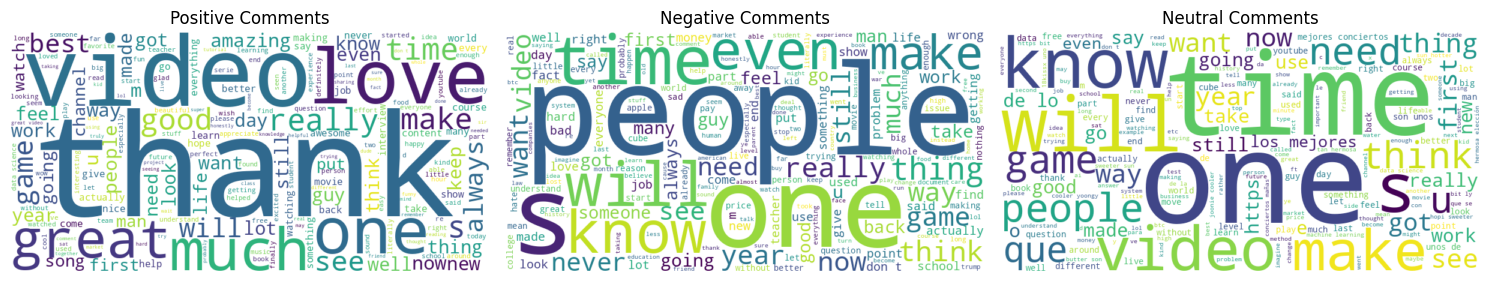

Sentiment
2    11432
1     4638
0     2338
Name: count, dtype: int64


In [ ]:
# Display the word clouds for each sentiment
plt.figure(figsize=(15, 10))

# Positive Word Cloud
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments')

# Negative Word Cloud
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Comments')

# Neutral Word Cloud
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Comments')

plt.tight_layout()
plt.show()
print(df['Sentiment'].value_counts())


**Feature Extraction**

In [ ]:
# Keep only the necessary columns
df = df[['Comment', 'Sentiment']]

# Check the modified dataset
print(df.head())

                                             Comment  Sentiment
0  let's not forget that apple pay in 2014 requir...          1
1  here in nz 50% of retailers don’t even have co...          0
2  i will forever acknowledge this channel with t...          2
3  whenever i go to a place that doesn’t take app...          0
4  apple pay is so convenient, secure, and easy t...          2


**Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# Step 1: Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1500, stop_words='english')

# Step 2: Apply vectorization
features_tfidf = tfidf.fit_transform(processed_features).toarray()
y_tfidf = df['Sentiment']


In [ ]:
# After alignment
tfidf = TfidfVectorizer(max_features=1500, stop_words='english')
features_tfidf = tfidf.fit_transform(processed_features).toarray()
y_tfidf = df['Sentiment']


In [ ]:
print(features_tfidf.shape)  # Should print (number_of_samples, 1500)
print(len(y_tfidf))  # Should print number_of_samples


(18408, 1500)
18408


In [ ]:
print(df['Sentiment'].isnull().sum())  # Check if there are any null values in the target column
print(len(processed_features))  # Check if there are fewer processed features than original data

0
18408


In [ ]:
x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(features_tfidf, y_tfidf, test_size=0.2, stratify=y_tfidf, random_state=0)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
features_resampled, labels_resampled = smote.fit_resample(features_tfidf, y_tfidf)

**Dictionary**

In [ ]:
# Convert the arrays to DataFrames
dict1 = pd.DataFrame(features_tfidf)

# Display the shapes to confirm successful transformation
print(dict1.shape)
dict1.shape

df.columns
x_tfidf=dict1.iloc[:,:]
y_tfidf=df.iloc[:,-1]
print(x_tfidf.shape)
print(y_tfidf.shape)
print(x_tfidf_train.shape)
print(y_tfidf_test.shape)

(18408, 1500)
(18408, 1500)
(18408,)
(14726, 1500)
(3682,)


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=80, random_state=0)
rf_classifier.fit(x_tfidf_train,  y_tfidf_train)
rf_predictions = rf_classifier.predict(x_tfidf_test)
accuracy_tfidf_rf = accuracy_score(y_tfidf_test, rf_predictions)

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
from sklearn import tree

# Step 1: Pick one of the trees from the random forest
estimator = rf_classifier.estimators_[0]  # Pick the first tree (or any other)

# Step 2: Export the tree in DOT format
dot_data = export_graphviz(estimator,
                           out_file=None,
                           feature_names=tfidf.get_feature_names_out(),  # Feature names from TF-IDF
                           class_names=['Negative', 'Neutral', 'Positive'],  # Sentiment labels
                           filled=True, rounded=True,
                           special_characters=True)

# Step 3: Convert DOT data to image using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

# Step 4: Display the tree image in Jupyter Notebook
Image(graph.create_png())

# Alternatively, save it to a file
graph.write_png("decision_tree.png")


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.247571 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.247571 to fit



True

In [ ]:
print(confusion_matrix(y_tfidf_test, rf_predictions))
print(classification_report(y_tfidf_test, rf_predictions))
print(accuracy_score(y_tfidf_test, rf_predictions))

[[ 106  147  215]
 [  62  545  321]
 [  34  228 2024]]
              precision    recall  f1-score   support

           0       0.52      0.23      0.32       468
           1       0.59      0.59      0.59       928
           2       0.79      0.89      0.84      2286

    accuracy                           0.73      3682
   macro avg       0.64      0.57      0.58      3682
weighted avg       0.71      0.73      0.71      3682

0.7265073329712113


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

mnb = MultinomialNB()

# Train with TF-IDF features
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(x_tfidf_train, y_tfidf_train)  # Correct train set variables
y_pred_tfidf = mnb_tfidf.predict(x_tfidf_test)
accuracy_tfidf_mnb = accuracy_score(y_tfidf_test, y_pred_tfidf)
precision_tfidf_mnb = precision_score(y_tfidf_test, y_pred_tfidf, average='micro')

print("TF-IDF - Accuracy:", accuracy_tfidf_mnb, "Precision:", precision_tfidf_mnb)

TF-IDF - Accuracy: 0.6852254209668658 Precision: 0.6852254209668658


In [ ]:
print(confusion_matrix(y_tfidf_test, y_pred_tfidf))
print(classification_report(y_tfidf_test, y_pred_tfidf))
print(accuracy_score(y_tfidf_test, y_pred_tfidf))

[[  73   44  351]
 [  30  284  614]
 [   5  115 2166]]
              precision    recall  f1-score   support

           0       0.68      0.16      0.25       468
           1       0.64      0.31      0.41       928
           2       0.69      0.95      0.80      2286

    accuracy                           0.69      3682
   macro avg       0.67      0.47      0.49      3682
weighted avg       0.68      0.69      0.63      3682

0.6852254209668658


In [ ]:
print("Training class distribution:", y_tfidf_train.value_counts())
print("Testing class distribution:", y_tfidf_test.value_counts())

Training class distribution: Sentiment
2    9146
1    3710
0    1870
Name: count, dtype: int64
Testing class distribution: Sentiment
2    2286
1     928
0     468
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    features_tfidf, df['Sentiment'], test_size=0.2, stratify=df['Sentiment'], random_state=0
)

from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma='auto')
# Train with TF-IDF features
svc_tfidf = SVC(kernel='sigmoid', gamma=1.0)
svc_tfidf.fit(x_tfidf_train, y_tfidf_train)  # Correct train set variables
y_pred_tfidf = svc_tfidf.predict(x_tfidf_test)  # Predict on TF-IDF test set


accuracy_tfidf_svc = accuracy_score(y_tfidf_test, y_pred_tfidf)
precision_tfidf_svc = precision_score(y_tfidf_test, y_pred_tfidf, average='micro')
print("TF-IDF - Accuracy:", accuracy_tfidf_svc, "Precision:", precision_tfidf_svc)

TF-IDF - Accuracy: 0.732753938077132 Precision: 0.732753938077132


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
gbc_tfidf = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Fit the model on the training set
gbc_tfidf.fit(x_tfidf_train, y_tfidf_train)

# Predict on the test set
y_pred_gbc_tfidf = gbc_tfidf.predict(x_tfidf_test)

# Evaluate the model using accuracy and precision
accuracy_tfidf_gbc = accuracy_score(y_tfidf_test, y_pred_gbc_tfidf)
precision_tfidf_gbc = precision_score(y_tfidf_test, y_pred_gbc_tfidf, average='micro')


In [ ]:
print(confusion_matrix(y_tfidf_test, y_pred_gbc_tfidf))
print(classification_report(y_tfidf_test, y_pred_gbc_tfidf))
print(accuracy_score(y_tfidf_test, y_pred_gbc_tfidf))
# Print the results
print("Gradient Boosting Classifier - TF-IDF Accuracy:", accuracy_tfidf_gbc, "Precision:", precision_tfidf_gbc)

[[  40    7  421]
 [   7  130  791]
 [   4   37 2245]]
              precision    recall  f1-score   support

           0       0.78      0.09      0.15       468
           1       0.75      0.14      0.24       928
           2       0.65      0.98      0.78      2286

    accuracy                           0.66      3682
   macro avg       0.73      0.40      0.39      3682
weighted avg       0.69      0.66      0.56      3682

0.655893536121673
Gradient Boosting Classifier - TF-IDF Accuracy: 0.655893536121673 Precision: 0.655893536121673


In [ ]:
# Create a summary DataFrame
accuracy_summary = {
    'Model': ['RandomForestClassifier','MultinomialNB', 'Gradient Boosting', 'SVC'],
    'TF-IDF Accuracy': [accuracy_tfidf_rf,accuracy_tfidf_mnb, accuracy_tfidf_gbc, accuracy_tfidf_svc]
}

accuracy_df = pd.DataFrame(accuracy_summary)

print(accuracy_df)

                    Model  TF-IDF Accuracy
0  RandomForestClassifier         0.726507
1           MultinomialNB         0.685225
2       Gradient Boosting         0.655894
3                     SVC         0.732754


In [ ]:
# from sklearn.ensemble import VotingClassifier
# # Step 2: Fit each model
# rf_classifier.fit(x_tfidf_train, y_tfidf_train)
# mnb.fit(x_tfidf_train, y_tfidf_train)
# gbc.fit(x_tfidf_train, y_tfidf_train)
# svc.fit(x_tfidf_train, y_tfidf_train)

In [ ]:
# # Step 3: Create a Voting Classifier
# voting_classifier = VotingClassifier(
#     estimators=[
#         ('rf', rf_classifier),
#         ('mnb', mnb),
#         ('gbc', gbc),
#         ('svc', svc)
#     ],
#     voting='hard'  # Use 'soft' for probability-based voting
# )

In [ ]:
# # Step 4: Train the Voting Classifier
# voting_classifier.fit(x_tfidf_train, y_tfidf_train)

# # Step 5: Evaluate the Voting Classifier
# y_pred = voting_classifier.predict(x_tfidf_test)

# from sklearn.metrics import classification_report
# print(classification_report(y_tfidf_test, y_pred))

In [ ]:
# # Calculate and print accuracy
# accuracy = accuracy_score(y_tfidf_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Create a summary DataFrame
accuracy_summary = {
    'Model': ['RandomForestClassifier','MultinomialNB', 'Gradient Boosting', 'SVC'],
    'TF-IDF Accuracy': [accuracy_tfidf_rf,accuracy_tfidf_mnb, accuracy_tfidf_gbc, accuracy_tfidf_svc]
}

accuracy_df = pd.DataFrame(accuracy_summary)

print(accuracy_df)

                    Model  TF-IDF Accuracy
0  RandomForestClassifier         0.726507
1           MultinomialNB         0.685225
2       Gradient Boosting         0.655894
3                     SVC         0.732754


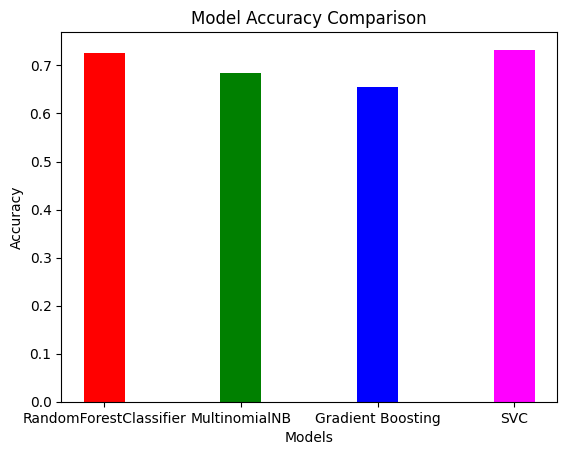

RandomForestClassifier(n_estimators=80, random_state=0)
TfidfVectorizer(max_features=1500, stop_words='english')


In [ ]:


# Plotting accuracy comparison
import matplotlib.pyplot as plt
import numpy as np

# Setting the bar width (reduce for less distance)
bar_width = 0.3

# Generating an index for the x-axis
index = np.arange(len(accuracy_df['Model']))

# Colors for each bar
colors = ['red', 'green', 'blue','Magenta']  # You can add more colors if there are more models

# Plotting bars with custom colors
bar = plt.bar(index, accuracy_df['TF-IDF Accuracy'], bar_width, color=colors, label='TF-IDF')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Customizing x-axis tick labels
plt.xticks(index, accuracy_df['Model'])


# Show the plot
plt.show()

print(rf_classifier)
print(tfidf)


In [ ]:
import pickle

# Example: Save the trained model and vectorizer
with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)





In [ ]:
# from google.colab import files
# files.download('model.pkl')
# files.download('vectorizer.pkl')